# ENTRENAMIENTO RED LSTM PARA CLASIFICACIÓN DE LENGUA DE SEÑAS COLOMBIANA

## Librerías a usar

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Input, Dense, Dropout, LeakyReLU
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variables de path

In [2]:
actual_dir = os.getcwd()
names_path = os.listdir(actual_dir+'/data/Input_Data')
map_classes = {label:identifier for identifier, label in enumerate(names_path)}
_ = list(map(lambda item: print(f'La clase #{item[1]} corresponde a {item[0]}.'), map_classes.items()))

La clase #0 corresponde a bancos.
La clase #1 corresponde a banios.
La clase #2 corresponde a comidas.
La clase #3 corresponde a juegosinfantiles.
La clase #4 corresponde a parqueaderos.


# Lectura de archivos .npy

In [3]:
values, labels = [], []
for name in names_path:
    action_path = os.path.join(actual_dir+'/data/Input_Data', name)
    for sample in range(0, len(os.listdir(action_path))):
        value = []
        sample_path = os.path.join(action_path, str(sample))
        for frame in range(0, len(os.listdir(sample_path))):
            frame_path = os.path.join(sample_path, str(frame)+'.npy')
            frame_value = np.load(frame_path)
            value.append(frame_value)
        values.append(value)
        labels.append(map_classes[name])
    print(f'El total de videos para la clase {name} es {sample + 1}')

El total de videos para la clase bancos es 38
El total de videos para la clase banios es 38
El total de videos para la clase comidas es 38
El total de videos para la clase juegosinfantiles es 38
El total de videos para la clase parqueaderos es 38


# Preprocesamiento de datos

In [4]:
X = np.array(values)
Y = to_categorical(labels).astype(int)
print(X.shape, Y.shape)

(190, 30, 1662) (190, 5)


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
print(f'Cantidad de muestras para X_train - Y_train respectivamente {X_train.shape[0]} - {Y_train.shape[0]}')
print(f'Cantidad de muestras para X_test - Y_test respectivamente {X_test.shape[0]} - {Y_test.shape[0]}')

Cantidad de muestras para X_train - Y_train respectivamente 133 - 133
Cantidad de muestras para X_test - Y_test respectivamente 57 - 57


In [6]:
LSTM_Model = Sequential()
LSTM_Model.add(Input(shape=(30, 1662)))
LSTM_Model.add(LSTM(64, return_sequences=True, activation="tanh", recurrent_activation="sigmoid", use_bias=True, unroll=True, dropout=0.3))
LSTM_Model.add(LSTM(64, return_sequences=True, activation="tanh", recurrent_activation="sigmoid", use_bias=True, unroll=True, dropout=0.3))
LSTM_Model.add(LSTM(64, return_sequences=False, activation="tanh", recurrent_activation="sigmoid", use_bias=True, unroll=True, dropout=0.2))
LSTM_Model.add(Dense(64, activation='relu'))    
LSTM_Model.add(Dropout(0.20))
LSTM_Model.add(Dense(32, activation='relu'))
LSTM_Model.add(Dense(len(names_path), activation='softmax'))

In [7]:
LSTM_Model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [8]:
LSTM_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,565 (1.96 MB)

 Trainable params: 514,565 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
fit_history = LSTM_Model.fit(X_train, Y_train, epochs = 215, validation_data=(X_test, Y_test))

Epoch 1/215
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - categorical_accuracy: 0.1468 - loss: 1.6242 - val_categorical_accuracy: 0.1579 - val_loss: 1.6078
Epoch 2/215
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.1556 - loss: 1.6314 - val_categorical_accuracy: 0.1579 - val_loss: 1.6191
Epoch 3/215
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.2586 - loss: 1.6073 - val_categorical_accuracy: 0.1053 - val_loss: 1.6363
Epoch 4/215
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.2531 - loss: 1.6079 - val_categorical_accuracy: 0.1053 - val_loss: 1.6449
Epoch 5/215
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.2002 - loss: 1.6076 - val_categorical_accuracy: 0.1053 - val_loss: 1.6643
Epoch 6/215
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.2518 - loss: 1.5967 - val_categorical_accuracy: 0.1053 - val_loss: 1.6798
Epoch 7/215
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.2628 - loss: 1.6081 - v

In [10]:
LSTM_Model.save('LSTM_Model_CPU.keras')

# Gráfica de histórico

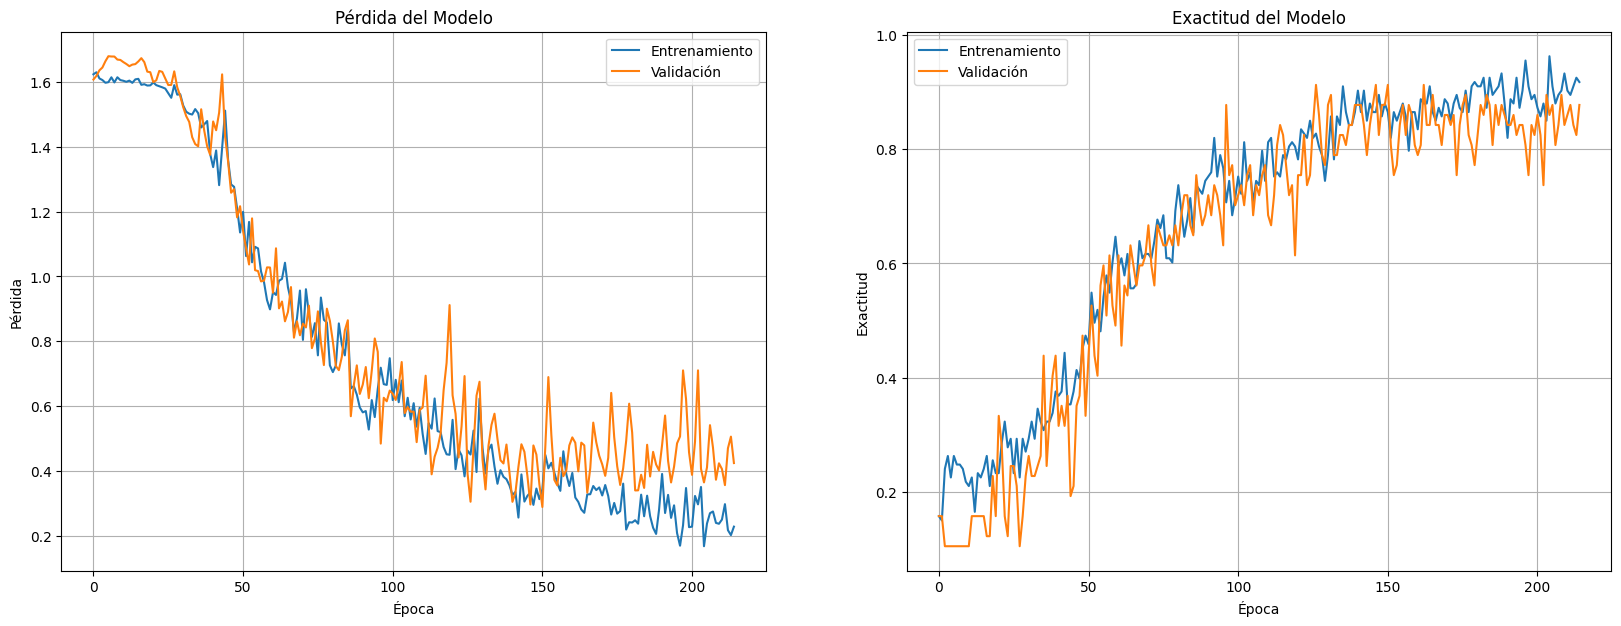

In [11]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(fit_history.history['loss'], label='Entrenamiento')
plt.plot(fit_history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(fit_history.history['categorical_accuracy'], label='Entrenamiento')
plt.plot(fit_history.history['val_categorical_accuracy'], label='Validación')
plt.title('Exactitud del Modelo')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.grid()
plt.legend()
plt.show()

# Métricas

In [12]:
LSTM_Model = tf.keras.models.load_model('LSTM_Model_CPU.keras', compile = False)
Y_pred = LSTM_Model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


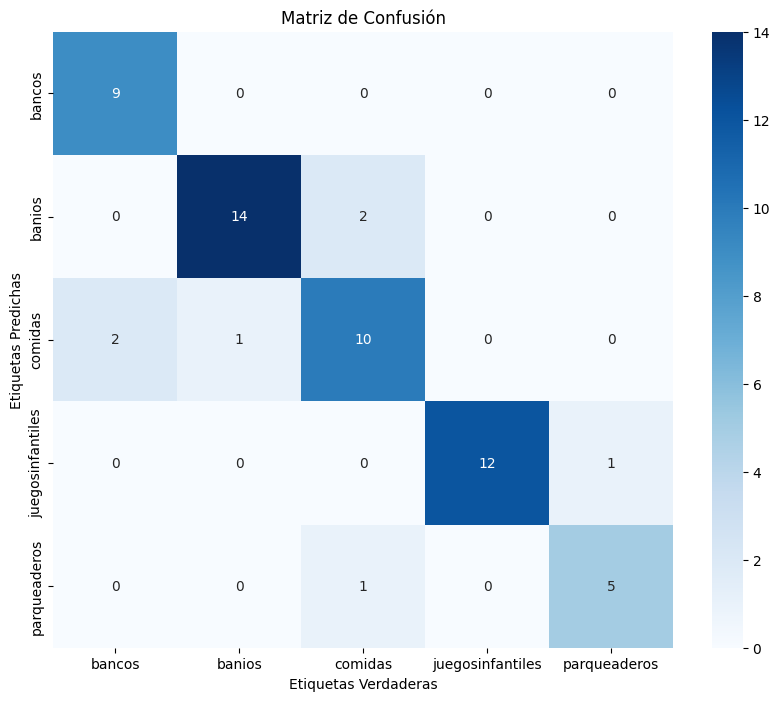

In [13]:
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=names_path, yticklabels=names_path)
plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas')
plt.title('Matriz de Confusión')
plt.show()

In [14]:
accuracy = accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
precision_general = precision_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1), average='weighted')
recall_general = recall_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1), average='weighted')
f1_general = f1_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1), average='weighted')

precision = precision_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1), average=None)
recall = recall_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1), average=None)
f1 = f1_score(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1), average=None)

print(f'Exactitud general: {accuracy}')
print(f'Precisión general: {precision_general}')
print(f'Sensibilidad general: {recall_general}')
print(f'Puntuación F1 general: {f1_general}')
print('\n')

for i, class_name in enumerate(names_path):
    print(f'Clase: {class_name}')
    print(f'Precisión: {precision[i]}')
    print(f'Sensibilidad (Recall): {recall[i]}')
    print(f'Puntuación F1: {f1[i]}\n')

Exactitud general: 0.8771929824561403
Precisión general: 0.8824029771398192
Sensibilidad general: 0.8771929824561403
Puntuación F1 general: 0.8777475947934352


Clase: bancos
Precisión: 0.8181818181818182
Sensibilidad (Recall): 1.0
Puntuación F1: 0.9

Clase: banios
Precisión: 0.9333333333333333
Sensibilidad (Recall): 0.875
Puntuación F1: 0.9032258064516129

Clase: comidas
Precisión: 0.7692307692307693
Sensibilidad (Recall): 0.7692307692307693
Puntuación F1: 0.7692307692307693

Clase: juegosinfantiles
Precisión: 1.0
Sensibilidad (Recall): 0.9230769230769231
Puntuación F1: 0.96

Clase: parqueaderos
Precisión: 0.8333333333333334
Sensibilidad (Recall): 0.8333333333333334
Puntuación F1: 0.8333333333333334

